In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [91]:
X = np.linspace(-2, 0, 25)
X1 = np.linspace(0, 2, 25)
X2 = np.linspace(-2, 2, 50)
A, B, C = 2, 3, -1 # Is the true value
Y = (A * X ** 2 + B * X + C) + np.random.rand(len(X))*0.75 #Quadratic equation
Y1 = (A * X1 ** 2 + B * X1 + C) + np.random.rand(len(X1))*0.75
Y2 = (A * X2 ** 2 + B * X2 + C) + np.random.rand(len(X2))*0.75


.71663819620787, theta_2=1.4349764639765734, cost=0.07411959897099424
iter=3350, theta_0=-1.173832751280698, theta_1=1.7180658467971992, theta_2=1.435543383236866, cost=0.07402279164169118
iter=3360, theta_0=-1.173073405761433, theta_1=1.7194913076423384, theta_2=1.4361094328329538, cost=0.07392628332842306
iter=3370, theta_0=-1.1723152246404696, theta_1=1.7209145821057603, theta_2=1.4366746141060185, cost=0.07383007311303169
iter=3380, theta_0=-1.1715582061441348, theta_1=1.7223356735445852, theta_2=1.4372389283948286, cost=0.07373416008008092
iter=3390, theta_0=-1.170802348500879, theta_1=1.7237545853106055, theta_2=1.4378023770357584, cost=0.07363854331685322
iter=3400, theta_0=-1.170047649941302, theta_1=1.725171320750296, theta_2=1.4383649613628082, cost=0.07354322191334636
iter=3410, theta_0=-1.1692941086981816, theta_1=1.7265858832048313, theta_2=1.4389266827076246, cost=0.07344819496226994
iter=3420, theta_0=-1.1685417230064834, theta_1=1.7279982760101082, theta_2=1.43948754239

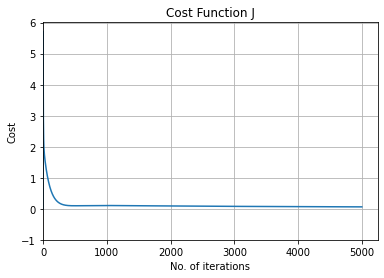

In [92]:
# Implement linear regression
# pick some random value to start with
theta_0 =   np.random.random()  # Coefficient C
theta_1 =   np.random.random()  # Coefficient B
theta_2 =   np.random.random()  # Coefficient A

def hypothesis (theta_0, theta_1, theta_2, X):
    return theta_2*X**2 + theta_1*X + theta_0 # hypothetical quadratic function

def cost_function (X, Y, theta_0, theta_1,theta_2):
    m = len(X)
    summation = 0.0
    for i in range (m):
        summation += ((theta_2 * X[i]**2 + theta_1 * X[i] + theta_0) - Y[i])**2  # Mean Square Error 
    return summation/(m)
    
def gradient_descent(X,Y, theta_0,theta_1,theta_2,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    t2_deriv = 0
    learning_rate = 0.0015
    m = len(X)
    
    for i in range (m):

        t0_deriv += (theta_2 * X[i]**2 + theta_1 * X[i] + theta_0) - Y[i]             # Partial Derivatives in respect to C
        t1_deriv += ((theta_2 * X[i]**2 + theta_1 * X[i] + theta_0) - Y[i]) * X[i]      # Partial Derivatives in respect to B
        t2_deriv += ((theta_2 * X[i]**2 + theta_1 * X[i] + theta_0) - Y[i]) * X[i]**2          # Partial Derivatives in respect to A

        theta_0 -= (1/m) * learning_rate * t0_deriv     # Multiplying the learning rate in the direction of the gradient average    
        theta_1 -= (1/m) * learning_rate * t1_deriv     # Multiplying the learning rate in the direction of the gradient average 
        theta_2 -= (1/m) * learning_rate * t2_deriv     # Multiplying the learning rate in the direction of the gradient average

    return  theta_0, theta_1, theta_2

def training (X, Y, theta_0, theta_1, theta_2, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    t2_history = [0]
  

    for i in range(iters):
        theta_0, theta_1, theta_2 = gradient_descent(X, Y, theta_0, theta_1, theta_2, learning_rate)

        t0_history.append(theta_0)  # for storing change in values for C
        t1_history.append(theta_1)  # for storing change in values for B
        t2_history.append(theta_2)  # for storing change in values for A

        cost = cost_function(X, Y, theta_0, theta_1, theta_2) 
        cost_history.append(cost) # for stroing change in cost which is the mean square error (MSE)
        
        if i%10 == 0:
            print ("iter={}, theta_0={}, theta_1={}, theta_2={}, cost={}".format(i, theta_0, theta_1,theta_2, cost))
    return t0_history, t1_history, t2_history, cost_history   

    # I chose learning rate equals 0.015 for 5000 iterations, and plot our cost function J
t0_history, t1_history, t2_history, cost_history = training(X, Y, theta_0, theta_1, theta_2, 0.001, 5000)

c = t0_history[4999]
b = t1_history[4999]
a = t2_history[4999] 

print("Predicted A", a)
print("Predicted B", b)
print("Predicted C", c)

# Plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

#exp = lambda cost_function: 10**(cost_function)`                                           
#log = lambda cost_function: np.log(cost_function)

#ax.set_yscale('function', functions=(exp, log))
plt.plot(cost_history)
plt.ylim(ymin=-1)
plt.xlim(xmin=-1)
#plt.plot(best_values[0]*X**2 + best_values[0]*X + best_values[0])
plt.grid()
plt.show()


In [93]:
X1 = np.linspace(0, 2, 25)
A, B, C = 2, 3, -1 # Is the true value
Y1 = (A * X1 ** 2 + B * X1 + C) + np.random.rand(len(X1))*0.75 #Quadratic equation


97, theta_1=2.8333044156855673, theta_2=2.1483886512776817, cost=0.06208501825512944
iter=3350, theta_0=-0.6397877129389891, theta_1=2.8352261580762637, theta_2=2.1472951464632075, cost=0.06196091826996792
iter=3360, theta_0=-0.6403163496328126, theta_1=2.8371416482306113, theta_2=2.146205199279834, cost=0.06183753840812619
iter=3370, theta_0=-0.6408432664490814, theta_1=2.8390509064897618, theta_2=2.1451187981530992, cost=0.06171487427149651
iter=3380, theta_0=-0.6413684689832827, theta_1=2.8409539531286954, theta_2=2.1440359315461888, cost=0.06159292148962976
iter=3390, theta_0=-0.6418919628127006, theta_1=2.8428508083564203, theta_2=2.142956587959824, cost=0.061471675719559096
iter=3400, theta_0=-0.6424137534964699, theta_1=2.8447414923162078, theta_2=2.141880755932138, cost=0.0613511326456279
iter=3410, theta_0=-0.6429338465756415, theta_1=2.8466260250857847, theta_2=2.1408084240385548, cost=0.0612312879793117
iter=3420, theta_0=-0.6434522475732403, theta_1=2.848504426677563, theta

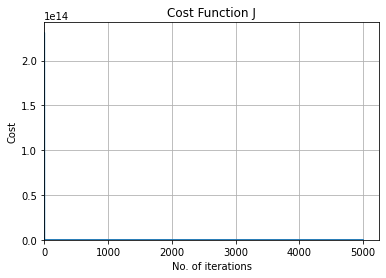

In [94]:
# Implement linear regression
# pick some random value to start with
theta_0 =   np.random.random()  # Coefficient C
theta_1 =   np.random.random()  # Coefficient B
theta_2 =   np.random.random()  # Coefficient A

def hypothesis (theta_0, theta_1, theta_2, X1):
    return theta_2*X1**2 + theta_1*X1 + theta_0 # hypothetical quadratic function

def cost_function (X1, Y1, theta_0, theta_1,theta_2):
    m = len(X1)
    summation = 0.0
    for i in range (m):
        summation += ((theta_2 * X1[i]**2 + theta_1 * X1[i] + theta_0) - Y1[i])**2  # Mean Square Error 
    return summation/(m)
    
def gradient_descent(X1,Y1, theta_0,theta_1,theta_2,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    t2_deriv = 0
    learning_rate = 0.0015
    m = len(X1)
    
    for i in range (m):

        t0_deriv += (theta_2 * X1[i]**2 + theta_1 * X1[i] + theta_0) - Y1[i]                # Partial Derivatives in respect to C
        t1_deriv += ((theta_2 * X1[i]**2 + theta_1 * X1[i] + theta_0) - Y1[i]) * X1[i]      # Partial Derivatives in respect to B
        t2_deriv += ((theta_2 * X1[i]**2 + theta_1 * X1[i] + theta_0) - Y1[i]) * X1[i]**2   # Partial Derivatives in respect to A

        theta_0 -= (1/m) * learning_rate * t0_deriv     # Multiplying the learning rate in the direction of the gradient average    
        theta_1 -= (1/m) * learning_rate * t1_deriv     # Multiplying the learning rate in the direction of the gradient average 
        theta_2 -= (1/m) * learning_rate * t2_deriv     # Multiplying the learning rate in the direction of the gradient average

    return  theta_0, theta_1, theta_2

def training (X1, Y1, theta_0, theta_1, theta_2, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    t2_history = [0]
  

    for i in range(iters):
        theta_0, theta_1, theta_2 = gradient_descent(X1, Y1, theta_0, theta_1, theta_2, learning_rate)

        t0_history.append(theta_0)  # for storing change in values for C
        t1_history.append(theta_1)  # for storing change in values for B
        t2_history.append(theta_2)  # for storing change in values for A

        cost = cost_function(X1, Y1, theta_0, theta_1, theta_2) 
        cost_history.append(cost) # for storing change in cost which is the mean square error (MSE)
        
        if i%10 == 0:
            print ("iter={}, theta_0={}, theta_1={}, theta_2={}, cost={}".format(i, theta_0, theta_1,theta_2, cost))
    return t0_history, t1_history, t2_history, cost_history   

    # I chose learning rate equals 0.015 for 5000 iterations, and plot our cost function J
t0_history, t1_history, t2_history, cost_history = training(X1, Y1, theta_0, theta_1, theta_2, 0.0015, 5000)

c2 = t0_history[4999] 
b2 = t1_history[4999] 
a2 = t2_history[4999] 

print("Predicted A2", a2)
print("Predicted B2", b2)
print("Predicted C2", c2)

# Plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

#exp = lambda cost_function: 10**(cost_function)`                                           
#log = lambda cost_function: np.log(cost_function)

#ax.set_yscale('function', functions=(exp, log))
plt.plot(np.exp(cost_history))
plt.ylim(ymin=-1)
plt.xlim(xmin=-1)
#plt.plot(best_values[0]*X**2 + best_values[0]*X + best_values[0])
plt.grid()
plt.show()


0.8805175584849749


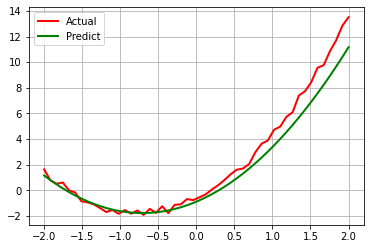

In [95]:
# Using the average of both curves
A1 = (a + a2)/2
B1 = (b + b2)/2
C1 = (c + c2)/2
X2 = np.linspace(-2,2,50)
y_hat2 = A1 * X2 ** 2 + B1 * X2 + C1

def Mean_Sqr_error (X2, Y2, A1, B1,C1):
    s= len(X2)
    summation = 0.0
    for i in range (s):
        summation += (y_hat2[i] - Y2[i])**2  # Mean Square Error 
    return summation/(s)
Objective = Mean_Sqr_error(X2, Y2, A1, B1,C1)
print(Objective)

plt.plot(X2, Y2, 'r-', linewidth=2, label='Actual')  
plt.plot(X2, y_hat2, 'g-',linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

0.11030499742619776


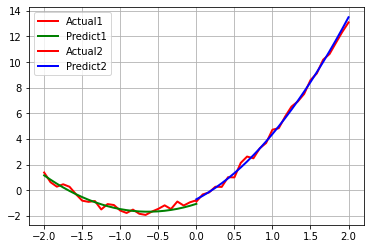

In [100]:

# using the sum of both curves

y_hat = a * X ** 2 + b * X + c

y_hat1 = a2 * X1 ** 2 + b2 * X1 + c2

def Mean_Sqr_error2 (X, Y, a, b,c):
    s= len(X)
    summation = 0.0
    for i in range (s):
        summation += (y_hat[i] - Y[i])**2  # Mean Square Error 
    return summation/(s)

Objective1 = Mean_Sqr_error2(X, Y, a, b,c)

def Mean_Sqr_error3 (X1, Y1, a2, b2,c2):
    s = len(X1)
    summation = 0.0
    for i in range (s):
        summation += (y_hat1[i] - Y1[i])**2  # Mean Square Error 
    return summation/(s)

Objective2 = Mean_Sqr_error3(X1, Y1, a2, b2,c2)
print(Objective1 + Objective2)


plt.plot(X, Y, 'r-', linewidth=2, label='Actual1')  
plt.plot(X, y_hat, 'g-', linewidth=2, label='Predict1')

plt.plot(X1, Y1, 'r-', linewidth=2, label='Actual2')  
plt.plot(X1, y_hat1, 'b', linewidth=2, label='Predict2')

plt.legend(loc='upper left')
plt.grid()
plt.show()